# Benchmark on all dataset

In [4]:
# Benchmark all models produced in this study
from models.deepprime import predict as deepprime_predict
from models.pridict import predict as pridict_predict
from models.transformer import predict as transformer_predict
from models.ensemble_adaboost import predict as ensemble_adaboost_predict
from models.ensemble_bagging import predict as ensemble_bagging_predict
from models.ensemble_weighted_mean import predict as ensemble_weighted_mean_predict
from models.conventional_ml_models import mlp_predict, random_forest_predict, xgboost_predict, ridge_predict
from glob import glob
from os.path import join as pjoin, basename

import os
import contextlib
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

import warnings
warnings.filterwarnings("ignore")

models = {
    'dp': deepprime_predict,
    'pd': pridict_predict,
    'tr': transformer_predict,
    'ada': ensemble_adaboost_predict,
    'bag': ensemble_bagging_predict,
    'pwm': ensemble_weighted_mean_predict,
    'mlp': mlp_predict,
    'rf': random_forest_predict,
    'xgb': xgboost_predict,
    'ridge': ridge_predict
}
# run predictions on all models on each dataset, calculate the pearson and spearman correlation
performance_p = {}
performance_s = {}

for data in glob(pjoin('models', 'data', 'std', '*.csv')):
    data_name = basename(data)
    print(data_name)
    df = pd.read_csv(data)
    # drop nan values
    df = df.dropna()
    target = df.iloc[:, -2]
    target = target.values
    target = target.astype(np.float32)

    performances_pearson = {}
    performances_spearman = {}
    # run predictions on all models
    for model in models:
        pearsons = []
        spearmans = []

        m = models[model]
        print(model)
        # collect the printout of the function
        with open(os.devnull, 'w') as f:
            with contextlib.redirect_stdout(f):
                predictions = m(data_name)
        
        for fold in range(5):
            # calculate the pearson and spearman correlation
            target_fold = target[df['fold'] == fold]
            predictions_fold = predictions.get(fold).flatten()
            # print(predictions)
            pearson = pearsonr(target_fold, predictions_fold)[0]
            spearman = spearmanr(target_fold, predictions_fold)[0]
            print(f'Fold {fold}: Pearson: {pearson}, Spearman: {spearman}')
            pearsons.append(pearson)
            spearmans.append(spearman)
        performances_pearson[model] = pearsons
        performances_spearman[model] = spearmans

    
    performance_p[data_name] = performances_pearson
    performance_s[data_name] = performances_spearman

# save the results
df_p = pd.DataFrame(performance_p)
df_s = pd.DataFrame(performance_s)
df_p.to_csv(pjoin('models', 'data', 'performance', 'all_models_pearson.csv'))
df_s.to_csv(pjoin('models', 'data', 'performance', 'all_models_spearman.csv'))

std-dp_small-hek293t-pe2.csv
dp
Fold 0: Pearson: 0.6797325428668728, Spearman: 0.565719935806897
Fold 1: Pearson: 0.538905873526943, Spearman: 0.558475831784042
Fold 2: Pearson: 0.4442011394003913, Spearman: 0.5586243522394836
Fold 3: Pearson: 0.49988335656996696, Spearman: 0.47491820675511387
Fold 4: Pearson: 0.5015146108991999, Spearman: 0.48863103818227643
pd
Fold 0: Pearson: 0.6139258974762143, Spearman: 0.5848158159719994
Fold 1: Pearson: 0.5889427248838501, Spearman: 0.6198352184027417
Fold 2: Pearson: 0.5938391655516249, Spearman: 0.6354717781168897
Fold 3: Pearson: 0.5650649310930191, Spearman: 0.5213789110669335
Fold 4: Pearson: 0.6894748697501996, Spearman: 0.5516805674049993
tr
Fold 0: Pearson: 0.4074551294850721, Spearman: 0.491254311002478
Fold 1: Pearson: 0.4351287577351286, Spearman: 0.4951366722081368
Fold 2: Pearson: 0.36296771886432566, Spearman: 0.5020338026167589
Fold 3: Pearson: 0.36370286496043036, Spearman: 0.44916076388356924
Fold 4: Pearson: 0.5551721373369674,

                                           dp    pd    tr   ada   bag   pwm  \
std-dp_small-hek293t-pe2.csv             0.53  0.61  0.42  0.49  0.50  0.51   
std-pd-k562-pe2.csv                      0.56  0.58  0.49  0.55  0.55  0.54   
std-dp_small-a549-pe4max_epegrna.csv     0.30  0.27  0.30  0.30  0.33  0.32   
std-dp_small-hek293t-pe2max_epegrna.csv  0.61  0.62  0.58  0.46  0.51  0.50   
std-dp_small-hek293t-pe4max_epegrna.csv  0.61  0.62  0.57  0.49  0.53  0.52   
std-pd-adv-pe2.csv                       0.53  0.53  0.41  0.47  0.48  0.48   
std-dp_small-hela-pe2max.csv             0.39  0.54  0.40  0.46  0.48  0.48   
std-pd-hek293t-pe2.csv                   0.81  0.81  0.79  0.84  0.84  0.83   
std-dp_small-hek293t-nrch_pe2.csv        0.55  0.57  0.55  0.60  0.60  0.61   
std-dp_small-dld1-nrch_pe4max.csv        0.55  0.56  0.53  0.61  0.62  0.61   
std-dp_small-dld1-pe2max.csv             0.63  0.63  0.59  0.53  0.58  0.56   
std-dp_small-nih3t3-nrch_pe4max.csv      0.49  0.49 

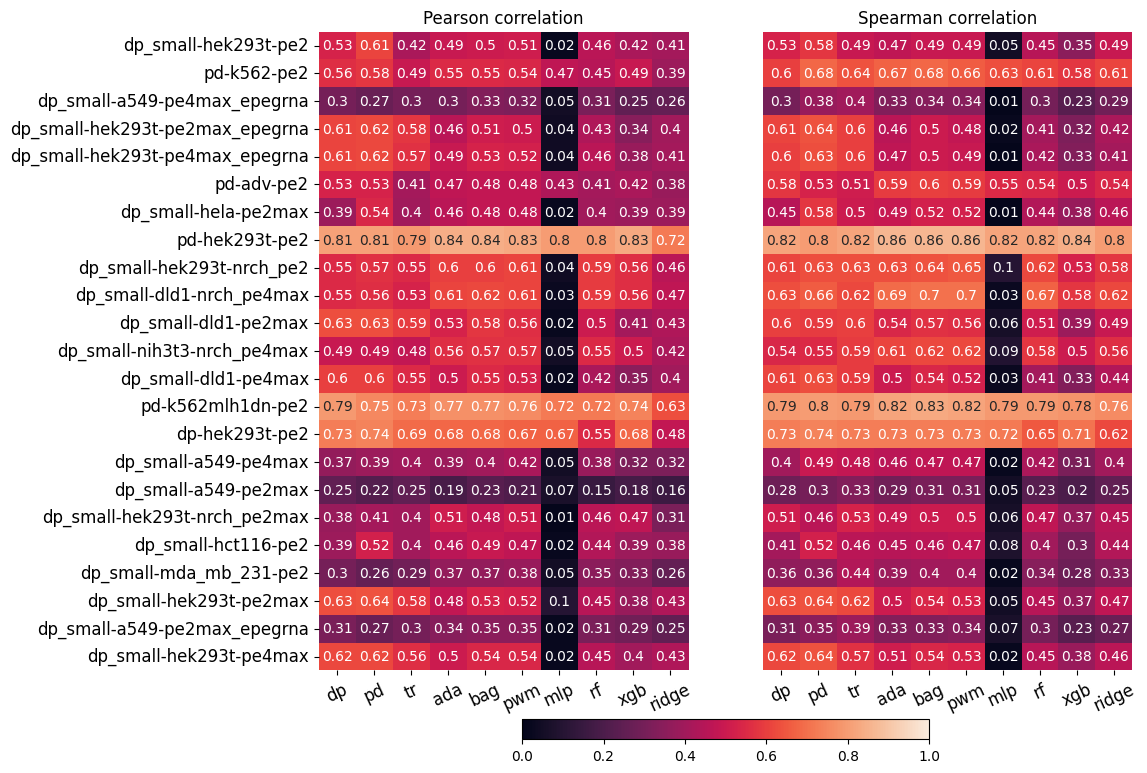

In [56]:
# plot the mean performance of each model vs dataset
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join as pjoin

from ast import literal_eval

df_pearson = pd.read_csv(pjoin('models', 'data', 'performance', 'all_models_pearson.csv'), index_col=0)
df_spearman = pd.read_csv(pjoin('models', 'data', 'performance', 'all_models_spearman.csv'), index_col=0)
# each cell is a list
df_pearson = df_pearson.applymap(lambda x: literal_eval(x))
df_spearman = df_spearman.applymap(lambda x: literal_eval(x))
df_pearson_mean = df_pearson.applymap(np.mean)
df_spearman_mean = df_spearman.applymap(np.mean)
df_pearson_mean = df_pearson_mean.applymap(lambda x: round(x, 2))
df_spearman_mean = df_spearman_mean.applymap(lambda x: round(x, 2))
df_pearson_mean = df_pearson_mean.applymap(lambda x: abs(x))
df_spearman_mean = df_spearman_mean.applymap(lambda x: abs(x))
df_pearson_mean = df_pearson_mean.T
df_spearman_mean = df_spearman_mean.T

print(df_pearson_mean)
# plot the results in heatmap
fig, axes = plt.subplots(1, 2, figsize=(10.5, 10.5))
sns.heatmap(df_pearson_mean, annot=True, ax=axes[0], vmin=0, vmax=1, cbar=False)
axes[0].set_title('Pearson correlation')
sns.heatmap(df_spearman_mean, annot=True, ax=axes[1], vmin=0, vmax=1, cbar=False)
axes[1].set_title('Spearman correlation')
# axes 1 should have no y label
# use one cbar for both axes
fig.colorbar(axes[0].collections[0], ax=axes, location='bottom'
             ,orientation='horizontal', shrink=0.5, pad=0.06)
axes[1].set_ylabel('')
axes[1].set_yticks([])

# remove the suffix of the dataset name at y axis
axes[0].set_yticklabels(['-'.join(x.split('.')[0].split('-')[1:]) for x in df_pearson_mean.index])

# update font size of the axes
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=25)
# plt.tight_layout()
plt.savefig(pjoin('dissertation', 'figures', 'all_models_performance.png'), dpi=300, bbox_inches='tight')

# Benchmark on Individual Edit Types